In [36]:
import pandas as pd
# Read the CSV file into a DataFrame
description = pd.read_csv('/Users/silverzoe/Documents/STUDY AT ENS/project - chinese fiction descriptions of baidu/重要文件/analysis/computational humanity conferences/documents/data/pre_analysis_love_discriptions.csv')
description.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3543 entries, 0 to 3542
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Unnamed: 0            3543 non-null   int64 
 1   DBID                  3542 non-null   object
 2   From_where_adapted_1  580 non-null    object
 3   From_where_adapted_2  34 non-null     object
 4   Name_chinese          3542 non-null   object
 5   Type                  3542 non-null   object
 6   Era                   1983 non-null   object
 7   Year                  3540 non-null   object
 8   Description_scholar   921 non-null    object
 9   Baidu_description     1459 non-null   object
 10  Wiki_description      1921 non-null   object
 11  baidu_cutted          3543 non-null   object
 12  scholar_cutted        3543 non-null   object
 13  wiki_cutted           3543 non-null   object
 14  baidu_length          3543 non-null   int64 
 15  wiki_length           3543 non-null   

# descriptive analysis of description datas

In [37]:
description['Year'] = pd.to_numeric(description['Year'], errors='coerce')

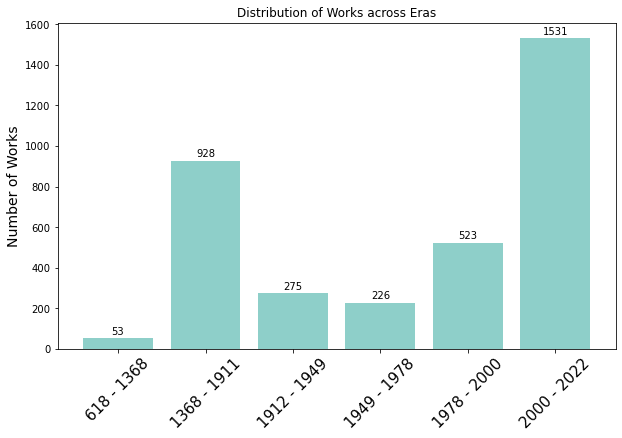

In [38]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))

# Define the boundaries for each category
boundary1 = (618, 1368)
boundary2 = (1368, 1911)
boundary3 = (1912, 1949)  # New interval: 1912 ~ 1949
boundary4 = (1949, 1978)  # New interval: 1949 ~ 1978
boundary5 = (1978, 2000)  # New interval: 1978 ~ 2022
boundary6 = (2000, 2023)

# Calculate the number of works in each interval
count1 = description[(description['Year'] >= boundary1[0]) & (description['Year'] < boundary1[1])].shape[0]
count2 = description[(description['Year'] >= boundary2[0]) & (description['Year'] < boundary2[1])].shape[0]
count3 = description[(description['Year'] >= boundary3[0]) & (description['Year'] <= boundary3[1])].shape[0]
count4 = description[(description['Year'] >= boundary4[0]) & (description['Year'] <= boundary4[1])].shape[0]
count5 = description[(description['Year'] >= boundary5[0]) & (description['Year'] <= boundary5[1])].shape[0]
count6 = description[(description['Year'] >= boundary6[0]) & (description['Year'] <= boundary6[1])].shape[0]


# Create a list of counts and categories
category_counts = [count1, count2, count3, count4, count5, count6]
categories = ['618 - 1368', '1368 - 1911', '1912 - 1949', '1949 - 1978', '1978 - 2000', '2000 - 2022']

# Plotting the bar chart
plt.bar(categories, category_counts, color='#8ECFC9')


plt.ylabel('Number of Works',fontsize = 14)
plt.title('Distribution of Works across Eras')

# Adding bar labels
for i, v in enumerate(category_counts):
    plt.text(i, v + 10, str(v), ha='center', va='bottom')

plt.xticks(rotation=45,fontsize = 15)  # Rotating x-axis labels for better readability
plt.show()


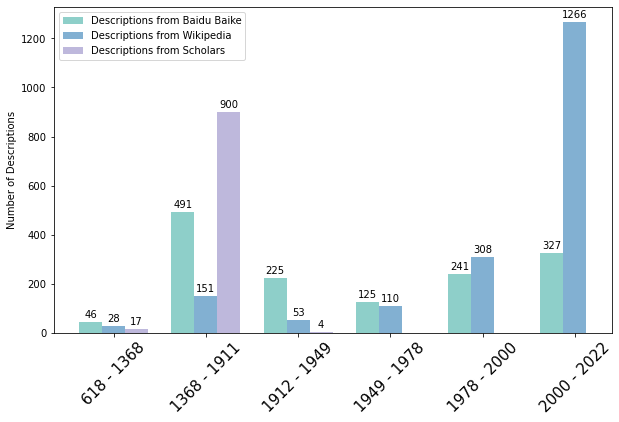

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Subset the DataFrame with necessary columns
subset_df = description[['Year', 'Baidu_description', 'Description_scholar', 'Wiki_description']]

# Convert the DataFrame into a long format
long_df = pd.melt(subset_df, id_vars='Year', var_name='Source', value_name='Description')

# Drop rows with empty descriptions
long_df.dropna(subset=['Description'], inplace=True)

# Define the boundaries for each category
boundary1 = (618, 1368)
boundary2 = (1368, 1911)
boundary3 = (1912, 1949)  # New interval: 1912 ~ 1949
boundary4 = (1949, 1978)  # New interval: 1949 ~ 1978
boundary5 = (1978, 2000)  # New interval: 1978 ~ 2022
boundary6 = (2000, 2023)

# Create a new column 'Time_Interval' based on the boundaries
long_df['Time_Interval'] = pd.cut(
    long_df['Year'],
    bins=[boundary1[0], boundary2[0], boundary3[0], boundary4[0], boundary5[0], boundary6[0], boundary6[1]],
    labels=['618 - 1368', '1368 - 1911', '1912 - 1949', '1949 - 1978', '1978 - 2000', '2000 - 2022']
)

# Group the data by time interval and source, and count the descriptions
grouped_data = long_df.groupby(['Time_Interval', 'Source']).size().unstack(fill_value=0)

# Filter out bars with a value of 0
grouped_data = grouped_data.loc[:, (grouped_data != 0).any(axis=0)]

# Create the bar plot
plt.figure(figsize=(10, 6))

# Define the colors for each source
colors = ['#8ECFC9','#82B0D2','#BEB8DC']

# Modify the captions for the sources
source_order = ['Baidu_description', 'Wiki_description', 'Description_scholar']
source_labels = ['Descriptions from Baidu Baike', 'Descriptions from Wikipedia', 'Descriptions from Scholars']

# Create the x-axis positions and labels for non-zero values
x_positions = np.arange(len(grouped_data.index))
x_labels = grouped_data.index[~(grouped_data == 0).all(axis=1)]

# Calculate the width of each bar
bar_width = 0.25

# Plot the bars for each source with updated labels
for i, source in enumerate(source_order):
    values = grouped_data[source]
    non_zero_values = values[values != 0]  # Filter out values of 0
    x = x_positions[:len(non_zero_values)] + i * bar_width
    plt.bar(x, non_zero_values, color=colors[i], width=bar_width, label=source_labels[i])
    # Add labels for each bar
    for j, value in enumerate(non_zero_values):
        plt.text(x[j], value + 10, str(value), ha='center', va='bottom')

# Customize the plot
plt.ylabel('Number of Descriptions')
plt.legend()
plt.xticks(x_positions[:len(x_labels)] + bar_width, x_labels, rotation=45, fontsize=15)

# Save the plot as an image file
plt.savefig('descriptions_by_time_interval.png')

# Show the plot
plt.show()


In [6]:
columns_to_keep = ['Name_chinese ', 'Year', 'baidu_cutted', 'scholar_cutted', 'wiki_cutted', 'baidu_length', 'wiki_length', 'scholar_length', 'love_baidu', 'love_wiki', 'love_scholar']
description = description[columns_to_keep]
description.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3543 entries, 0 to 3542
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Name_chinese    3542 non-null   object 
 1   Year            3537 non-null   float64
 2   baidu_cutted    3543 non-null   object 
 3   scholar_cutted  3543 non-null   object 
 4   wiki_cutted     3543 non-null   object 
 5   baidu_length    3543 non-null   int64  
 6   wiki_length     3543 non-null   int64  
 7   scholar_length  3543 non-null   int64  
 8   love_baidu      3543 non-null   int64  
 9   love_wiki       3543 non-null   int64  
 10  love_scholar    3543 non-null   int64  
dtypes: float64(1), int64(6), object(4)
memory usage: 304.6+ KB


In [7]:
# Replace non-finite values (NaN and inf) with a placeholder (0 in this case)
description['Year'] = description['Year'].replace([np.nan, np.inf, -np.inf], 0)

# Convert 'Year' column to int64
description['Year'] = description['Year'].astype('int64')


In [8]:

description = description[description['Year'] < 1949]

In [9]:


#here we calculate the words numbers related to romantic love that used in original texts
#the dictionary is developed for vanarcular for full texts, but here we try to use it in descriptions
description['love_full_baidu'] = sum(description['baidu_cutted'].str.count(x) for x in ('鸳鸯', '佳人', '相会', '姻缘', '知己', '冤家',  '亲热', '恩爱', '有情', '宠爱', '多情',  '温柔',   '专一', '风月', '负心', '云雨', '依依', '温存', '良缘', '情人', '私情',  '欢娱',  '相爱',  '相亲', '红了脸', '吃醋', '缠绵', '亲密', '恋恋', '知音', '深情', '因缘', '绸缪', '天缘', '钟爱', '爱慕', '动心', '痴情', '纠缠', '薄情', '倾心', '钟情', '鸾凤', '佳期', '佳偶', '连理', '合欢', '薄幸', '红丝', '双飞',  '伉俪', '结发', '琴瑟', '羞得', '齐眉', '爱情',  '鸳', '亲爱', '前缘', '春心', '贪恋', '欲火', '娇羞', '亲亲', '爱妻', '交欢', '偕老', '恋', '缠扰', '相怜', '引逗', '并蒂', '迷恋', '情爱', '奇缘', '异心', '私奔', '眷恋', '羞涩', '投缘', '情痴', '情投意合', '恋恋不舍', '交合', '苟合', '含情', '所迷', '柔情',  '依恋', '夙缘', '死心塌地', '露水', '情缘', '脉脉', '动情', '错爱', '卿卿', '秦晋',  '缱绻',  '情浓', '鱼水', '爱人',  '甜言', '情重', '似水', '思慕', '重圆', '吻', '相守', '情思', '传情', '眉来眼去', '丝萝', '情郎', '挑逗', '密约', '山盟', '心痒', '比翼', '红着脸', '两情', '柔肠', '旖旎', '心跳', '好逑', '涨红', '媚态', '海誓', '调情', '郎才女貌', '成双', '破镜', '偷情',  '欢会', '春情', '变心', '醋意', '情种', '双栖', '夙孽', '情趣', '心软', '适人', '宿缘', '欢爱', '相许', '誓言', '幽情', '同寝', '再续', '交颈', '夫妻之情', '蜜语', '有情人', '同修', '盟约', '求凰', '暧昧', '儿女情', '厮守', '情好', '坚贞', '赤绳', '亲昵', '孽海', '委身', '定情', '怦怦', '撩人', '情话', '恩爱夫妻', '心迷', '涨红了脸', '夫妻恩爱', '两心', '恣情', '雨意', '娇态', '欢好', '无情无义',  '相亲相爱', '心许', '并头', '情根', '如鱼得水', '夫唱妇随', '同心结', '好合', '朝欢暮乐', '一双两好', '甜蜜', '甜言蜜语', '倾慕', '恋爱', '颠鸾倒凤', '胶漆', '如胶似漆', '怜香惜玉', '始终如一', '相期', '款曲', '爱侣', '海誓山盟', '爱恋', '情天',  '连理枝', '天生一对', '良姻', '着迷', '情热', '动了心', '甘言', '相敬如宾', '耳鬓', '结发夫妻', '比目',  '情侣', '看不上眼', '欢情', '破镜重圆', '忌妒', '同欢', '亲亲热热', '孽缘', '情动', '情牵', '阮郎', '贪欢', '眉目之间', '有情有义', '甚笃', '情之所钟', '欲海', '偷香窃玉', '热爱', '争风', '耳鬓厮磨', '一见倾心', '我爱你', '玉怜香', '百年之好', '情网', '儿女情长', '鱼水之', '白头偕老', '山盟海誓', '私约', '追欢', '惜玉怜香', '生怜', '独钟', '送情', '如鱼似水', '新婚燕尔', '动兴', '真爱', '妒意', '佳儿佳妇', '软款', '竹马', '情愫', '举案齐眉', '儿女之情', '佳配', '一见钟情', '幽期', '佳会', '苦恋', '旧好', '白头到老', '海枯石烂', '淫兴', '同梦', '云情雨意', '心心相印',  '我见犹怜', '比翼鸟', '眷眷', '牵情', '羞容', '拈酸', '宠妾', '眷爱', '美语', '露水夫妻', '爱河', '迷心', '相慕', '情魔', '殉情', '男女之间', '心痒难挠', '痴爱', '贞心', '得谐', '云情', '妒念', '如意郎君', '君子好逑', '两小无猜', '盟言', '情孽', '蜜意', '鸳侣', '投胶', '百年偕老', '情有独钟', '燕好', '神迷', '脉脉含情', '成双作对', '羞红', '燕尔新婚', '爱宠', '无限深情', '刻骨铭心', '重谐', '妒恨', '甜蜜蜜', '患难夫妻', '甜言美语', '似漆', '多情种子', '情生', '情场', '白头相守', '成对', '鸾颠凤倒', '柔肠寸断', '心荡', '淫奔', '若有情', '倒凤颠鸾', '幽期密约', '爱悦', '心摇', '薄情郎', '凤双飞',  '不羡仙', '许结', '亲亲的', '芳情', '男欢女爱', '鸳帐', '握雨携云', '干柴烈火', '小两口儿', '你怜', '情伤', '旧缘', '明珠暗投', '欢合', '荡意', '轻怜', '私爱', '妒火', '鸳盟', '生红', '心头肉', '相思苦', '以身相许', '凤侣', '柔情似水', '凤友鸾交', '伉俪之情', '伉俪情深', '宴尔', '密爱', '誓海盟山', '鱼水和谐', '狂淫', '谐欢', '恋恋难舍', '青梅竹马', '私誓', '别恋', '柔情蜜意', '琴瑟调和', '目荡', '夙契', '卿卿我我', '意动', '意洽', '询情', '床第之间', '情真意切', '似漆如胶', '相倾', '死心踏地', '永谐', '私盟', '淫纵', '妒火中烧', '心盟', '始终不渝', '明珠投暗', '齐眉举', '甜甜蜜蜜', '心荡神摇', '天生地设', '妒愤', '情投', '夺人之爱', '共谐', '深情厚意', '如漆似胶', '有情人终成眷属', '恩爱情深', '系赤绳', '乐昌破镜', '柔情媚态', '齐眉举案', '新缘', '心头鹿撞', '罗敷有夫', '宴尔新婚', '挂肚牵肠', '看上眼', '蜜爱', '情孚', '爱人儿', '乐昌之镜', '深情厚谊', '甜言媚语', '与子偕老', '心爱人', '情衷', '倡随', '终成眷属', '失恋', '情意深厚', '百年好合', '耳鬓斯磨', '欢谐', '自由恋爱', '情真意挚', '深情款款', '鹤侣', '目挑心招', '完夙约', '儿女之债', '谈恋爱', '美人恩重', '牵恋', '淫火', '情深意切', '定情之物', '结不解缘', '誓谐', '思伊', '牵鸾', '撩心', '似膝', '昵情', '柔情万种', '动凡念', '密盟', '款款深情', '鸳文', '鱼水深情', '风凰良匹'))
description['love_full_wiki'] = sum(description['wiki_cutted'].str.count(x) for x in ('鸳鸯', '佳人', '相会', '姻缘', '知己', '冤家',  '亲热', '恩爱', '有情', '宠爱', '多情',  '温柔',   '专一', '风月', '负心', '云雨', '依依', '温存', '良缘', '情人', '私情',  '欢娱',  '相爱',  '相亲', '红了脸', '吃醋', '缠绵', '亲密', '恋恋', '知音', '深情', '因缘', '绸缪', '天缘', '钟爱', '爱慕', '动心', '痴情', '纠缠', '薄情', '倾心', '钟情', '鸾凤', '佳期', '佳偶', '连理', '合欢', '薄幸', '红丝', '双飞',  '伉俪', '结发', '琴瑟', '羞得', '齐眉', '爱情',  '鸳', '亲爱', '前缘', '春心', '贪恋', '欲火', '娇羞', '亲亲', '爱妻', '交欢', '偕老', '恋', '缠扰', '相怜', '引逗', '并蒂', '迷恋', '情爱', '奇缘', '异心', '私奔', '眷恋', '羞涩', '投缘', '情痴', '情投意合', '恋恋不舍', '交合', '苟合', '含情', '所迷', '柔情',  '依恋', '夙缘', '死心塌地', '露水', '情缘', '脉脉', '动情', '错爱', '卿卿', '秦晋',  '缱绻',  '情浓', '鱼水', '爱人',  '甜言', '情重', '似水', '思慕', '重圆', '吻', '相守', '情思', '传情', '眉来眼去', '丝萝', '情郎', '挑逗', '密约', '山盟', '心痒', '比翼', '红着脸', '两情', '柔肠', '旖旎', '心跳', '好逑', '涨红', '媚态', '海誓', '调情', '郎才女貌', '成双', '破镜', '偷情',  '欢会', '春情', '变心', '醋意', '情种', '双栖', '夙孽', '情趣', '心软', '适人', '宿缘', '欢爱', '相许', '誓言', '幽情', '同寝', '再续', '交颈', '夫妻之情', '蜜语', '有情人', '同修', '盟约', '求凰', '暧昧', '儿女情', '厮守', '情好', '坚贞', '赤绳', '亲昵', '孽海', '委身', '定情', '怦怦', '撩人', '情话', '恩爱夫妻', '心迷', '涨红了脸', '夫妻恩爱', '两心', '恣情', '雨意', '娇态', '欢好', '无情无义',  '相亲相爱', '心许', '并头', '情根', '如鱼得水', '夫唱妇随', '同心结', '好合', '朝欢暮乐', '一双两好', '甜蜜', '甜言蜜语', '倾慕', '恋爱', '颠鸾倒凤', '胶漆', '如胶似漆', '怜香惜玉', '始终如一', '相期', '款曲', '爱侣', '海誓山盟', '爱恋', '情天',  '连理枝', '天生一对', '良姻', '着迷', '情热', '动了心', '甘言', '相敬如宾', '耳鬓', '结发夫妻', '比目',  '情侣', '看不上眼', '欢情', '破镜重圆', '忌妒', '同欢', '亲亲热热', '孽缘', '情动', '情牵', '阮郎', '贪欢', '眉目之间', '有情有义', '甚笃', '情之所钟', '欲海', '偷香窃玉', '热爱', '争风', '耳鬓厮磨', '一见倾心', '我爱你', '玉怜香', '百年之好', '情网', '儿女情长', '鱼水之', '白头偕老', '山盟海誓', '私约', '追欢', '惜玉怜香', '生怜', '独钟', '送情', '如鱼似水', '新婚燕尔', '动兴', '真爱', '妒意', '佳儿佳妇', '软款', '竹马', '情愫', '举案齐眉', '儿女之情', '佳配', '一见钟情', '幽期', '佳会', '苦恋', '旧好', '白头到老', '海枯石烂', '淫兴', '同梦', '云情雨意', '心心相印',  '我见犹怜', '比翼鸟', '眷眷', '牵情', '羞容', '拈酸', '宠妾', '眷爱', '美语', '露水夫妻', '爱河', '迷心', '相慕', '情魔', '殉情', '男女之间', '心痒难挠', '痴爱', '贞心', '得谐', '云情', '妒念', '如意郎君', '君子好逑', '两小无猜', '盟言', '情孽', '蜜意', '鸳侣', '投胶', '百年偕老', '情有独钟', '燕好', '神迷', '脉脉含情', '成双作对', '羞红', '燕尔新婚', '爱宠', '无限深情', '刻骨铭心', '重谐', '妒恨', '甜蜜蜜', '患难夫妻', '甜言美语', '似漆', '多情种子', '情生', '情场', '白头相守', '成对', '鸾颠凤倒', '柔肠寸断', '心荡', '淫奔', '若有情', '倒凤颠鸾', '幽期密约', '爱悦', '心摇', '薄情郎', '凤双飞',  '不羡仙', '许结', '亲亲的', '芳情', '男欢女爱', '鸳帐', '握雨携云', '干柴烈火', '小两口儿', '你怜', '情伤', '旧缘', '明珠暗投', '欢合', '荡意', '轻怜', '私爱', '妒火', '鸳盟', '生红', '心头肉', '相思苦', '以身相许', '凤侣', '柔情似水', '凤友鸾交', '伉俪之情', '伉俪情深', '宴尔', '密爱', '誓海盟山', '鱼水和谐', '狂淫', '谐欢', '恋恋难舍', '青梅竹马', '私誓', '别恋', '柔情蜜意', '琴瑟调和', '目荡', '夙契', '卿卿我我', '意动', '意洽', '询情', '床第之间', '情真意切', '似漆如胶', '相倾', '死心踏地', '永谐', '私盟', '淫纵', '妒火中烧', '心盟', '始终不渝', '明珠投暗', '齐眉举', '甜甜蜜蜜', '心荡神摇', '天生地设', '妒愤', '情投', '夺人之爱', '共谐', '深情厚意', '如漆似胶', '有情人终成眷属', '恩爱情深', '系赤绳', '乐昌破镜', '柔情媚态', '齐眉举案', '新缘', '心头鹿撞', '罗敷有夫', '宴尔新婚', '挂肚牵肠', '看上眼', '蜜爱', '情孚', '爱人儿', '乐昌之镜', '深情厚谊', '甜言媚语', '与子偕老', '心爱人', '情衷', '倡随', '终成眷属', '失恋', '情意深厚', '百年好合', '耳鬓斯磨', '欢谐', '自由恋爱', '情真意挚', '深情款款', '鹤侣', '目挑心招', '完夙约', '儿女之债', '谈恋爱', '美人恩重', '牵恋', '淫火', '情深意切', '定情之物', '结不解缘', '誓谐', '思伊', '牵鸾', '撩心', '似膝', '昵情', '柔情万种', '动凡念', '密盟', '款款深情', '鸳文', '鱼水深情', '风凰良匹'))
description['love_full_scholar'] = sum(description['scholar_cutted'].str.count(x) for x in ('鸳鸯', '佳人', '相会', '姻缘', '知己', '冤家',  '亲热', '恩爱', '有情', '宠爱', '多情',  '温柔',   '专一', '风月', '负心', '云雨', '依依', '温存', '良缘', '情人', '私情',  '欢娱',  '相爱',  '相亲', '红了脸', '吃醋', '缠绵', '亲密', '恋恋', '知音', '深情', '因缘', '绸缪', '天缘', '钟爱', '爱慕', '动心', '痴情', '纠缠', '薄情', '倾心', '钟情', '鸾凤', '佳期', '佳偶', '连理', '合欢', '薄幸', '红丝', '双飞',  '伉俪', '结发', '琴瑟', '羞得', '齐眉', '爱情',  '鸳', '亲爱', '前缘', '春心', '贪恋', '欲火', '娇羞', '亲亲', '爱妻', '交欢', '偕老', '恋', '缠扰', '相怜', '引逗', '并蒂', '迷恋', '情爱', '奇缘', '异心', '私奔', '眷恋', '羞涩', '投缘', '情痴', '情投意合', '恋恋不舍', '交合', '苟合', '含情', '所迷', '柔情',  '依恋', '夙缘', '死心塌地', '露水', '情缘', '脉脉', '动情', '错爱', '卿卿', '秦晋',  '缱绻',  '情浓', '鱼水', '爱人',  '甜言', '情重', '似水', '思慕', '重圆', '吻', '相守', '情思', '传情', '眉来眼去', '丝萝', '情郎', '挑逗', '密约', '山盟', '心痒', '比翼', '红着脸', '两情', '柔肠', '旖旎', '心跳', '好逑', '涨红', '媚态', '海誓', '调情', '郎才女貌', '成双', '破镜', '偷情',  '欢会', '春情', '变心', '醋意', '情种', '双栖', '夙孽', '情趣', '心软', '适人', '宿缘', '欢爱', '相许', '誓言', '幽情', '同寝', '再续', '交颈', '夫妻之情', '蜜语', '有情人', '同修', '盟约', '求凰', '暧昧', '儿女情', '厮守', '情好', '坚贞', '赤绳', '亲昵', '孽海', '委身', '定情', '怦怦', '撩人', '情话', '恩爱夫妻', '心迷', '涨红了脸', '夫妻恩爱', '两心', '恣情', '雨意', '娇态', '欢好', '无情无义',  '相亲相爱', '心许', '并头', '情根', '如鱼得水', '夫唱妇随', '同心结', '好合', '朝欢暮乐', '一双两好', '甜蜜', '甜言蜜语', '倾慕', '恋爱', '颠鸾倒凤', '胶漆', '如胶似漆', '怜香惜玉', '始终如一', '相期', '款曲', '爱侣', '海誓山盟', '爱恋', '情天',  '连理枝', '天生一对', '良姻', '着迷', '情热', '动了心', '甘言', '相敬如宾', '耳鬓', '结发夫妻', '比目',  '情侣', '看不上眼', '欢情', '破镜重圆', '忌妒', '同欢', '亲亲热热', '孽缘', '情动', '情牵', '阮郎', '贪欢', '眉目之间', '有情有义', '甚笃', '情之所钟', '欲海', '偷香窃玉', '热爱', '争风', '耳鬓厮磨', '一见倾心', '我爱你', '玉怜香', '百年之好', '情网', '儿女情长', '鱼水之', '白头偕老', '山盟海誓', '私约', '追欢', '惜玉怜香', '生怜', '独钟', '送情', '如鱼似水', '新婚燕尔', '动兴', '真爱', '妒意', '佳儿佳妇', '软款', '竹马', '情愫', '举案齐眉', '儿女之情', '佳配', '一见钟情', '幽期', '佳会', '苦恋', '旧好', '白头到老', '海枯石烂', '淫兴', '同梦', '云情雨意', '心心相印',  '我见犹怜', '比翼鸟', '眷眷', '牵情', '羞容', '拈酸', '宠妾', '眷爱', '美语', '露水夫妻', '爱河', '迷心', '相慕', '情魔', '殉情', '男女之间', '心痒难挠', '痴爱', '贞心', '得谐', '云情', '妒念', '如意郎君', '君子好逑', '两小无猜', '盟言', '情孽', '蜜意', '鸳侣', '投胶', '百年偕老', '情有独钟', '燕好', '神迷', '脉脉含情', '成双作对', '羞红', '燕尔新婚', '爱宠', '无限深情', '刻骨铭心', '重谐', '妒恨', '甜蜜蜜', '患难夫妻', '甜言美语', '似漆', '多情种子', '情生', '情场', '白头相守', '成对', '鸾颠凤倒', '柔肠寸断', '心荡', '淫奔', '若有情', '倒凤颠鸾', '幽期密约', '爱悦', '心摇', '薄情郎', '凤双飞',  '不羡仙', '许结', '亲亲的', '芳情', '男欢女爱', '鸳帐', '握雨携云', '干柴烈火', '小两口儿', '你怜', '情伤', '旧缘', '明珠暗投', '欢合', '荡意', '轻怜', '私爱', '妒火', '鸳盟', '生红', '心头肉', '相思苦', '以身相许', '凤侣', '柔情似水', '凤友鸾交', '伉俪之情', '伉俪情深', '宴尔', '密爱', '誓海盟山', '鱼水和谐', '狂淫', '谐欢', '恋恋难舍', '青梅竹马', '私誓', '别恋', '柔情蜜意', '琴瑟调和', '目荡', '夙契', '卿卿我我', '意动', '意洽', '询情', '床第之间', '情真意切', '似漆如胶', '相倾', '死心踏地', '永谐', '私盟', '淫纵', '妒火中烧', '心盟', '始终不渝', '明珠投暗', '齐眉举', '甜甜蜜蜜', '心荡神摇', '天生地设', '妒愤', '情投', '夺人之爱', '共谐', '深情厚意', '如漆似胶', '有情人终成眷属', '恩爱情深', '系赤绳', '乐昌破镜', '柔情媚态', '齐眉举案', '新缘', '心头鹿撞', '罗敷有夫', '宴尔新婚', '挂肚牵肠', '看上眼', '蜜爱', '情孚', '爱人儿', '乐昌之镜', '深情厚谊', '甜言媚语', '与子偕老', '心爱人', '情衷', '倡随', '终成眷属', '失恋', '情意深厚', '百年好合', '耳鬓斯磨', '欢谐', '自由恋爱', '情真意挚', '深情款款', '鹤侣', '目挑心招', '完夙约', '儿女之债', '谈恋爱', '美人恩重', '牵恋', '淫火', '情深意切', '定情之物', '结不解缘', '誓谐', '思伊', '牵鸾', '撩心', '似膝', '昵情', '柔情万种', '动凡念', '密盟', '款款深情', '鸳文', '鱼水深情', '风凰良匹'))
description.head()


,Name_chinese,Year,baidu_cutted,scholar_cutted,wiki_cutted,baidu_length,wiki_length,scholar_length,love_baidu,love_wiki,love_scholar,love_full_baidu,love_full_wiki,love_full_scholar
0,太平广记,978,"['', '太平广记', '', '引书', '大约', '四百', '多种', '', '...",['nan'],"['', '太平广记', '', '', '是', '宋代', '李', '昉', '等',...",942,151,0,0,0,0,0,0,0
1,搜神记,400,"['', '搜神记', '', '内容', '十分', '丰富', '', '有', '谶纬...",['nan'],"['', '搜神记', '', '仅存', '辑本', '', '共分', '二十卷', '...",738,976,0,4,0,0,4,0,0
2,古镜记,612,"['隋汾', '阴侯生', '', '天下', '奇士', '也', '', '王度', '...",['nan'],"['', '古镜', '记', '', '是', '唐朝', '小说', '', '一说',...",15449,1306,0,1,0,0,2,0,0
3,游仙窟,700,"['', '游仙', '窟', '', '用', '第一人称', '单数', '', '自叙...",['nan'],"['张', '?', '?', '', '字', '文成', '', '唐朝', '进士',...",1684,1151,0,2,2,0,8,3,0
4,飞燕外传,700,"['赵后', '飞燕', '', '父冯', '万金', '', '祖', '大力', ''...",['nan'],"['', '外传', '', '是', '以', '宫闱', '祕', '闻', '为', ...",12615,1087,0,0,0,0,7,0,0


In [10]:
# here we read the df of love frequencies in full texts 
# pre-processing code can be access in the folder "full texts"
merged_df = pd.read_csv('love frequencies in full text.csv')
merged_df

,Name,Length,Love,type,fiction_year
0,青城山隐者记,1192,2,classical,1445
1,岭表录异,9290,6,classical,900
2,玄怪录,23522,22,classical,830
3,大唐新语,55126,26,classical,807
4,独异志,21850,12,classical,800
...,...,...,...,...,...
797,鼓掌绝尘,160458,585,venacular,1631
798,七十二朝人物演义,145778,416,venacular,1640
799,楹联丛话全编,220350,530,venacular,1840
800,京都儒士,615,1,venacular,810


In [11]:
# Find the novels that exist in both dataframes based on the "Name" column
#here 339 novels have both original texts and descriptions
common_novels = description[description['Name_chinese '].isin(merged_df['Name'])]
common_novels.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 361 entries, 0 to 3439
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Name_chinese       361 non-null    object
 1   Year               361 non-null    int64 
 2   baidu_cutted       361 non-null    object
 3   scholar_cutted     361 non-null    object
 4   wiki_cutted        361 non-null    object
 5   baidu_length       361 non-null    int64 
 6   wiki_length        361 non-null    int64 
 7   scholar_length     361 non-null    int64 
 8   love_baidu         361 non-null    int64 
 9   love_wiki          361 non-null    int64 
 10  love_scholar       361 non-null    int64 
 11  love_full_baidu    361 non-null    int64 
 12  love_full_wiki     361 non-null    int64 
 13  love_full_scholar  361 non-null    int64 
dtypes: int64(10), object(4)
memory usage: 42.3+ KB


In [12]:
# Merge the information from the second dataframe into the first one, keeping all rows from df1
merged_df1 = pd.merge(merged_df, common_novels, left_on='Name', right_on='Name_chinese ', how='left')
merged_df1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 823 entries, 0 to 822
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Name               823 non-null    object 
 1   Length             823 non-null    int64  
 2   Love               823 non-null    int64  
 3   type               823 non-null    object 
 4   fiction_year       823 non-null    int64  
 5   Name_chinese       361 non-null    object 
 6   Year               361 non-null    float64
 7   baidu_cutted       361 non-null    object 
 8   scholar_cutted     361 non-null    object 
 9   wiki_cutted        361 non-null    object 
 10  baidu_length       361 non-null    float64
 11  wiki_length        361 non-null    float64
 12  scholar_length     361 non-null    float64
 13  love_baidu         361 non-null    float64
 14  love_wiki          361 non-null    float64
 15  love_scholar       361 non-null    float64
 16  love_full_baidu    361 non

In [13]:
merged_df1['love_ratio'] = merged_df1['Love'] / merged_df1['Length']

merged_df1['love_full_wiki_ratio'] = merged_df1['love_full_wiki'] / merged_df1['wiki_length']
merged_df1['love_full_scholar_ratio'] = merged_df1['love_full_scholar'] / merged_df1['scholar_length']
merged_df1['love_full_baidu_ratio'] = merged_df1['love_full_baidu'] / merged_df1['baidu_length']


In [14]:
num_descriptions = merged_df1[['baidu_length', 'wiki_length', 'scholar_length']].gt(0).sum(axis=1)
sum_ratios = merged_df1['love_full_baidu_ratio'].fillna(0) + merged_df1['love_full_wiki_ratio'].fillna(0) + merged_df1['love_full_scholar_ratio'].fillna(0)

merged_df1['average_ratio'] = sum_ratios / num_descriptions
merged_df1.dropna(subset=['average_ratio'], inplace=True)
merged_df1.head()


,Name,Length,Love,type,fiction_year,Name_chinese,Year,baidu_cutted,scholar_cutted,wiki_cutted,...,love_wiki,love_scholar,love_full_baidu,love_full_wiki,love_full_scholar,love_ratio,love_full_wiki_ratio,love_full_scholar_ratio,love_full_baidu_ratio,average_ratio
8,夜雨秋灯录,117739,413,classical,1877,夜雨秋灯录,1877.0,"['', '夜雨', '秋灯录', '', '全书', '8', '卷', '', '共',...",['nan'],['nan'],...,0.0,0.0,1.0,0.0,0.0,0.003508,NaN,NaN,0.001357,0.001357
10,夜谭随录,128019,248,classical,1791,夜谭随录,1791.0,"['全书', '半为', '传奇', '体', '', '半为', '笔记', '体', '...",['nan'],['nan'],...,0.0,0.0,1.0,0.0,0.0,0.001937,NaN,NaN,0.000926,0.000926
13,万锦情林,158998,1332,classical,1600,万锦情林,1600.0,"['', '万锦情', '林', '', '是', '明代', '三台', '馆山人', '...","['上层', '一攀', '篇目', '', '华阳', '奇遇', '张于', '溥记',...",['nan'],...,0.0,0.0,1.0,0.0,7.0,0.008377,NaN,0.001576,0.006024,0.003800
20,淞隐漫录,223678,957,classical,1875,淞隐漫录,1875.0,"['卷', '一', '', '记', '日本', '女子', '阿传事', '', '',...",['nan'],"['', '淞', '隐', '漫录', '', '清', '王韬', '刻印', '于',...",...,0.0,0.0,0.0,0.0,0.0,0.004278,0.0,NaN,0.000000,0.000000
27,明镜公案,22256,41,classical,1630,明镜公案,1630.0,['nan'],"['帣', '一', '人命', '类', '朱大', '尊察非', '火死', '见', ...",['nan'],...,0.0,1.0,0.0,0.0,1.0,0.001842,NaN,0.000340,NaN,0.000340


In [15]:
merged_df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 360 entries, 8 to 819
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Name                     360 non-null    object 
 1   Length                   360 non-null    int64  
 2   Love                     360 non-null    int64  
 3   type                     360 non-null    object 
 4   fiction_year             360 non-null    int64  
 5   Name_chinese             360 non-null    object 
 6   Year                     360 non-null    float64
 7   baidu_cutted             360 non-null    object 
 8   scholar_cutted           360 non-null    object 
 9   wiki_cutted              360 non-null    object 
 10  baidu_length             360 non-null    float64
 11  wiki_length              360 non-null    float64
 12  scholar_length           360 non-null    float64
 13  love_baidu               360 non-null    float64
 14  love_wiki                3

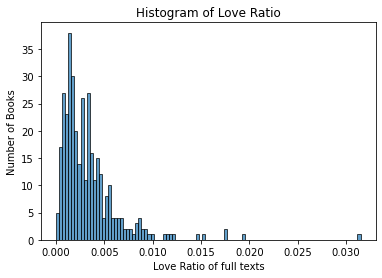

In [23]:
# check the distribution histogram of two ratios to see if log scale can be applied to 
# Compute the histogram data
bins = 100
plt.hist(merged_df1['love_ratio'], bins=bins, edgecolor='black', alpha=0.7)
plt.xlabel('Love Ratio of full texts')
plt.ylabel('Number of Books')
plt.title('Histogram of Love Ratio')
plt.show()

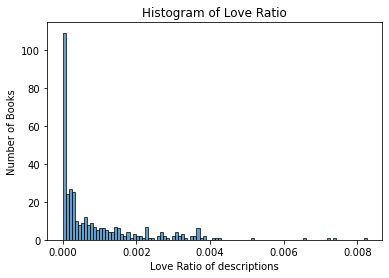

In [21]:
# check the distribution histogram of two ratios to see if log scale can be applied to 
# Compute the histogram data
bins = 100
plt.hist(merged_df1['average_ratio'], bins=bins, edgecolor='black', alpha=0.7)
plt.xlabel('Love Ratio of descriptions')
plt.ylabel('Number of Books')
plt.title('Histogram of Love Ratio')
plt.show()

In [25]:
from scipy.stats import pearsonr
# Extract the cleaned columns
column1_cleaned = merged_df1['love_ratio']
column2_cleaned = merged_df1['average_ratio']

# Calculate the correlation
correlation, p_value = pearsonr(column1_cleaned, column2_cleaned)
print("Correlation between Column1 and Column2 (after removing NaN):", correlation)
print("P-value:", p_value)

Correlation between Column1 and Column2 (after removing NaN): 0.5144447571316018
P-value: 1.0283703794026573e-25


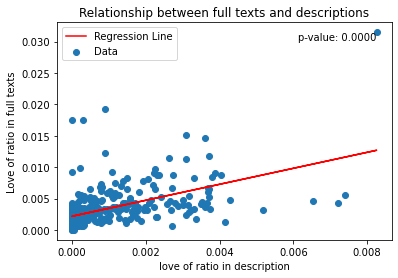

In [28]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Assuming you have already imported the necessary libraries and have the DataFrame 'merged_df1_cleaned'

# Extract the 'love_scholar' and 'Love' columns
x = merged_df1['average_ratio']
y = merged_df1['love_ratio']

# Plot the scatter plot
plt.scatter(x, y, label='Data')

# Fit a linear regression line
slope, intercept, r_value, p_value, std_err = stats.linregress(x, y)
line = slope * x + intercept
plt.plot(x, line, color='r', label='Regression Line')

# Add labels and title
plt.xlabel('love of ratio in description')
plt.ylabel('Love of ratio in full texts')
plt.title('Relationship between full texts and descriptions')

# Add the p-value to the plot
plt.text(x.max(), y.max(), f'p-value: {p_value:.4f}', ha='right', va='top')

# Add a legend
plt.legend()

# Display the plot
plt.show()


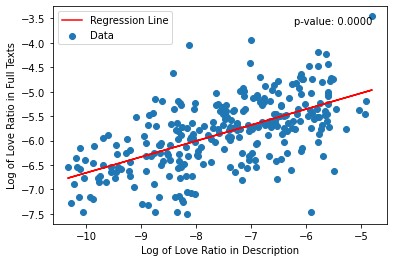

In [33]:
# here we want to see the effect more clear, thus we plot a log version of the correlation
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

# Filter out zero and negative values from the data
filtered_df = merged_df1[(merged_df1['average_ratio'] > 0) & (merged_df1['love_ratio'] > 0)]

# Extract the 'love_scholar' and 'Love' columns
x = filtered_df['average_ratio']
y = filtered_df['love_ratio']

# Compute the logarithm of the variables
log_x = np.log(x)
log_y = np.log(y)

# Plot the scatter plot with logarithmic axes
plt.scatter(log_x, log_y, label='Data')

# Fit a linear regression line on the logarithmic data
slope, intercept, r_value, p_value, std_err = stats.linregress(log_x, log_y)
line = slope * log_x + intercept
plt.plot(log_x, line, color='r', label='Regression Line')

# Add labels and title
plt.xlabel('Log of Love Ratio in Description')
plt.ylabel('Log of Love Ratio in Full Texts')

# Add the p-value to the plot
plt.text(log_x.max(), log_y.max(), f'p-value: {p_value:.4f}', ha='right', va='top')

# Add a legend
plt.legend()
plt.savefig('correlation between full texts and descriptions.png')
# Display the plot
plt.show()